# Theme 4

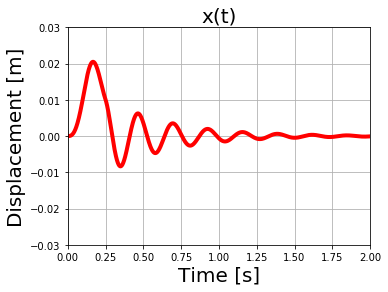

In [2]:
#ODE equations in matrix form:
#problem 4-95
import numpy as np
def xdot(X,t,m,c,k):
    #system properties:
    E = np.array([[0,1],[-k/m,-c/m]]) #E matrix
    #F(t)
    if t>=0 and t<=0.1:
        F = 200*t
    elif t>0.1 and t<=0.25:
        F = 20
    else:
        F = 0
    Q = np.array([[0,F/m]]).T #Q matrix
    #Convert X to a 4 by 1 column vector by np.array([X]).T
    xdot = E.dot(np.array([X]).T)+Q
    #Return X as a 1 dimensional list
    return xdot.T[0]

#Run script
from scipy.integrate import odeint
from matplotlib import pyplot as plt
#Define system parameters
m = 2.0
c = 10.0
k = 1500.0
#Integrate DE
t0 = 0.0 #start time
tf =2.0 #end time
tspan = np.arange(t0,tf,0.001) #interval
X0 = np.array([0,0]) #initial values for displacement and velocity
X = odeint(xdot,X0,tspan,args=(m,c,k))

plt.plot(tspan,X[:,0],color='r',linewidth=4)
plt.xlabel('Time [s]',fontsize=20)
plt.ylabel('Displacement [m]',fontsize=20)
plt.title('x(t)',fontsize=20)
plt.xlim(0,tf)
plt.ylim(-0.03,0.03)
plt.grid(True)
plt.subplots_adjust(left=.2,right=.9,hspace=.4,wspace=.9)

plt.show()

In [3]:
import sympy as sp
import numpy as np
from IPython.display import display as dsp

A, t, n, j, w = sp.symbols('A, t, n, j, w')
tau = (2*sp.pi)/w
w = (2*sp.pi)/tau
x = A*(t/tau)

x_0 = sp.simplify(w/sp.pi*(sp.integrate(x,(t, 0, tau))))

dsp(x_0)

    
x_n = x*(sp.cos(j*w*t))
z = sp.simplify(w/sp.pi *(sp.integrate(x_n, (t,0,tau))))
dsp(z)
           
y_n = x*(sp.sin(j*w*t))
y = sp.simplify(2/tau *(sp.integrate(y_n,(t,0,tau))))
dsp(y)

dsp(z.subs(j,1))
dsp(y.subs(j,3))

A

Piecewise((A, Eq(j, 0) | Eq(w, 0) | (Eq(j, 0) & Eq(w, 0))), (A*(2*pi*j*sin(2*pi*j) + cos(2*pi*j) - 1)/(2*pi**2*j**2), True))

Piecewise((0, Eq(j, 0) | Eq(w, 0) | (Eq(j, 0) & Eq(w, 0))), (-A*cos(2*pi*j)/(pi*j) + A*sin(2*pi*j)/(2*pi**2*j**2), True))

Piecewise((A, Eq(w, 0)), (0, True))

Piecewise((0, Eq(w, 0)), (-A/(3*pi), True))

t = [0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08
 1.12 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6  1.64
 1.68 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.   2.04 2.08 2.12 2.16 2.2
 2.24 2.28 2.32 2.36 2.4  2.44 2.48 2.52 2.56 2.6  2.64 2.68 2.72 2.76
 2.8  2.84 2.88 2.92 2.96 3.   3.04 3.08 3.12 3.16 3.2  3.24 3.28 3.32
 3.36 3.4  3.44 3.48 3.52 3.56 3.6  3.64 3.68 3.72 3.76 3.8  3.84 3.88
 3.92 3.96 4.  ]


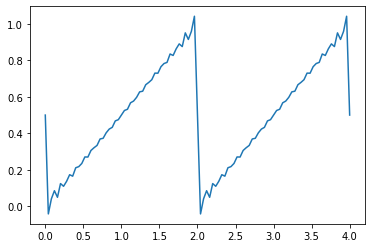

In [4]:
#x(t) = a/2 + sum[ (an*cos(n*w*t)) + (bn*sin( n*w*t))]

#Ex 1.19 Fourier series expansion
#x(t) = A/2 - A/pi sin(w*t) - A/2*pi sin(2*w*t)....

import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0,4,101)
print('t =',t)

A = 1
w = np.pi
sum1 = 0

for i in range(1,20,1):
    
    y = (1/i)*np.sin(i*w*t)
    
    sum1 +=y
    

x = (A/np.pi)*((np.pi/2) - sum1)

#y1 = np.sin(w*t)
#x1 = (A/np.pi)*((np.pi/2) - y)        single term expansion

plt.figure(1)
plt.plot(t,x)

#plt.plot(t,x1)

In [5]:
import sympy as sp
import numpy as np
from IPython.display import display

A, B, t, pi = sp.symbols('A, B, t, pi')
tau = 2
w = sp.pi
#B = 50000*A
F1 = B*t
F2 = B*(2-t)

a_0 = 2/tau*(sp.integrate(F1,(t,0,1)) + sp.integrate(F2, (t,1,2)))

print(a_0)

a_j = []
b_j = []

for j in range(1,4,1):
    
    F3 = F1*(sp.cos(j*w*t))
    F4 = F2*(sp.cos(j*w*t))
    
    x = 2/tau *(sp.integrate(F3, (t,0,1)) + sp.integrate(F4,(t,1,2)))
    a_j.append(x)
    
    F5 = F1*(sp.sin(j*w*t))
    F6 = F2*(sp.sin(j*w*t))
    
    y = 2/tau *(sp.integrate(F5, (t,0,1)) + sp.integrate(F6,(t,1,2)))
    b_j.append(y)

print('a0 =',a_0)
print('aj =',a_j)
print('bj =',b_j)

1.0*B
a0 = 1.0*B
aj = [-4.0*B/pi**2, 0, -0.444444444444444*B/pi**2]
bj = [0, 0, 0]


t = [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.  ]
j = 1
j = 3
j = 5


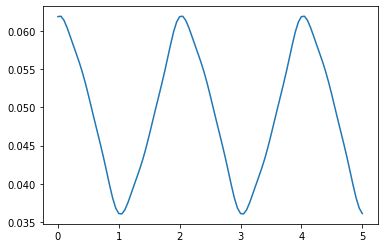

In [6]:
import  matplotlib.pyplot as plt


t = np.linspace(0,5,101)
print('t =',t)
A =1.96E-3

a_0 = 25000*A
a_j = (2*10**5*A)/(j**2 *np.pi**2)
b_j = 0
w = np.pi

Z = 0.05
k = 1000
r = 0.8

sum1 = 0
sum2 = 0

for j in range(1,6,2):              #j in odd numbers (1,x,2)    #j in even (2n) 

    print('j =',j)
    phi = np.arctan((2*Z*j*r)/(1-j**2*r**2))
    
    y1 = ((a_j/k)/np.sqrt((1-j**2*r**2)**2 + (2*Z*j*r)**2))*np.cos(j*w*t - phi)
    
    y2 = ((b_j/k)/np.sqrt((1-j**2*r**2)**2 + (2*Z*j*r)**2))*np.cos(j*w*t - phi)
    
    sum1 += y1
    sum2 += y2
    
xp = a_0/k + sum1 + sum2

plt.figure(2)
plt.plot(t,xp)

# Theme 5 

In [7]:
import numpy as np
import sympy as sp
import scipy.linalg as la
from IPython.display import display as dsp
import matplotlib.pyplot as plt

In [9]:
#Runge kutta MDOF

In [8]:
#Eigenval
#|A-yI|=0                       {X}=0 (non trivial)
#|y[I]-[D]| = 0                 [D] = [m]*[k]^-1

#|[k] - w^2[m]| = 0

In [12]:
#P6.65
k1 = 20
k2 = 10
k3 = 10
k4 = 10
k5 = 10
m1 = 20
m2 = 10
m3 = 10

K = np.array([[k1+k2+k3, -k2, -k3],[-k2, k2+k4, 0], [-k3, 0, k3+k5]])        #from EoM
M = np.array([[m1,0,0],[0,m2,0],[0,0,m3]])

v,w = la.eig(K,M)                                                            #v = eigenvals, w = eigenvector

omega1 = v
omega2 = v**0.5


f = w2/(2*np.pi)

print('w1 ={}, w2 = {}, w3 = {}'.format(omega2[0],omega2[2],omega2[1]),'rad/s')
print('w1^2 = {} and w2^2 = {} and w3^2 = {}'.format(omega1[0],omega1[2],omega1[1]))
print('===+'*30)
print('nat freq = {} and {} and {}'.format(f[0],f[2], f[1]),'Hz')
print('===+'*30)
print('')

mode = np.array([[w[0,0]/w[0,0], w[1,0]/w[0,0], w[2,0]/w[0,0]], [w[0,1]/w[0,1], w[1,1]/w[0,1], w[2,1]/w[0,1]], [w[0,2]/w[0,2], w[1,2]/w[0,2],w[2,2]/w[0,2]]])
print('!!'*30)
print('IF VERY LARGE MODE IS EQUAL TO ZEROS!!!!!!')
print('!!'*30)
print('mode1 =');dsp(sp.Matrix(mode[0].T))

print('mode2 = '),dsp(sp.Matrix(mode[2].T))

print('mode3 ='),dsp(sp.Matrix(mode[1].T))

my_array = mode.T
my_array[:,[1, 2]] = my_array[:,[2, 1]]

print('mode matrix =')
dsp(sp.Matrix(my_array))

w1 =(0.9999999999999999+0j), w2 = (1.414213562373095+0j), w3 = (1.7320508075688772+0j) rad/s
w1^2 = (0.9999999999999999+0j) and w2^2 = (1.9999999999999998+0j) and w3^2 = (2.9999999999999996+0j)
===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+


TypeError: 'Mul' object is not subscriptable

In [13]:
#P6.65
# ignore the mess just need equation in terms of omega to plot below
k1,k2,k3,k4,k5,m3,m1,m2,w = sp.symbols('k1,k2,k3,k4,k5,m3,m1,m2,w')

k1 = 20
k2 = 10
k3 = 10
k4 = 10
k5 = 10
m1 = 20
m2 = 10
m3 = 10

I = sp.eye(3)
Lambda = 1/w**2
w2 = 1/Lambda
k = sp.Matrix([[k1+k2+k3, -k2, -k3],[-k2, k2+k4, 0], [-k3, 0, k3+k5]])
K = np.array([[k1+k2+k3, -k2, -k3],[-k2, k2+k4, 0], [-k3, 0, k3+k5]])
m = sp.Matrix([[m1,0,0],[0,m2,0],[0,0,m3]])
M = np.array([[m1,0,0],[0,m2,0],[0,0,m3]])

delta_w2 = sp.det(k - (w2)*m)

print('delta_omega2 =',delta_w2)


print('='*100)
D = m*k**-1

d = M*(np.linalg.inv(K))
equation = sp.Eq(sp.det(D-Lambda*I), 0)

delta = (Lambda*k - D)

sol = sp.solve(equation)

omega2 = np.array(sol)**2

p = []
om = []
for i in range(1,6,2):
    
    f = (omega2[i])**0.5 * 1/(2*np.pi)
    ega = omega2[i]
    p.append(f)
    om.append(ega)

print('omega^2 =', om)
print('natural frequencies =',p)

eig = sp.Eq((D - om[0]*I),0)


delta_omega2 = 2000*w**2 + (20 - 10*w**2)**2*(40 - 20*w**2) - 4000
omega^2 = [1, 2, 3]
natural frequencies = [0.159154943091895, 0.225079079039277, 0.275664447710896]


Text(0, 0.5, 'delta(omega^2)')

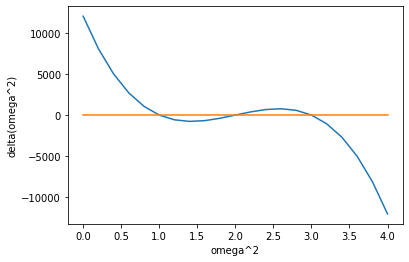

In [14]:
w2 = np.linspace(0,4,21)
w = np.sqrt(w2)

sol_line = 0*w2

f = -2000*w**6 + 12000*w**4 - 22000*w**2 + 12000        #delta_omega2 from above

plt.figure(1)
plt.plot(w2,f)
plt.plot(w2,sol_line)
plt.xlabel('omega^2')
plt.ylabel('delta(omega^2)')

In [15]:
K = np.array([[40,-10,-10],[-10,20,0],[-10,0,20]])
M = np.array([[20,0,0],[0,10,0],[0,0,10]])

w,v = la.eig(K,M)

print('==='*20)
print(v)                       
print('==='*20)
print('eigenvals = {}, {}, {}'.format(w[0],w[2],w[1]))


f = w**0.5/(2*np.pi)
print('nat freq ={}, {}, {}'.format(f[0],f[2],f[1]))

[[ 5.77350269e-01  5.77350269e-01  5.87223741e-35]
 [ 5.77350269e-01 -5.77350269e-01  7.07106781e-01]
 [ 5.77350269e-01 -5.77350269e-01 -7.07106781e-01]]
eigenvals = (0.9999999999999999+0j), (1.9999999999999998+0j), (2.9999999999999996+0j)
nat freq =(0.15915494309189532+0j), (0.22507907903927651+0j), (0.27566444771089604+0j)


In [16]:
#P5.5
k1 = 1000
k2 = 2000
m1 = 20
m2 = 40

k = np.array([[k1+k2, -k2],[-k2, k2]])
m = np.array([[m1,0],[0,m2]])

v,w = la.eig(k,m)

w1 = v
w2 = v**0.5

f = w2/(2*np.pi)

print('w1 ={} and w2 = {}'.format(w2[1],w2[0]),'rad/s')
print('w1^2 ={} and w2^2 = {}'.format(w1[1],w1[0]))
print('===+'*20)
print('nat freq = {} and {}'.format(f[1],f[0]),'Hz')
print('===+'*20)

mode = np.array([[1,w[1,0]/w[0,0]],[1,w[1,1]/w[0,1]]])

print('mode1 =');dsp(sp.Matrix(mode[1].T))

print('mode2 ='),dsp(sp.Matrix(mode[0].T))

w1 =(3.660254037844386+0j) and w2 = (13.660254037844386+0j) rad/s
w1^2 =(13.39745962155613+0j) and w2^2 = (186.60254037844382+0j)
===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+
nat freq = (0.5825475230950034+0j) and (2.1740969540139568+0j) Hz
===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+===+
mode1 =


Matrix([
[             1.0],
[1.36602540378444]])

mode2 =


Matrix([
[               1.0],
[-0.366025403784439]])

(None, None)

# Eigenvalues,mode shapes,natural frequencies


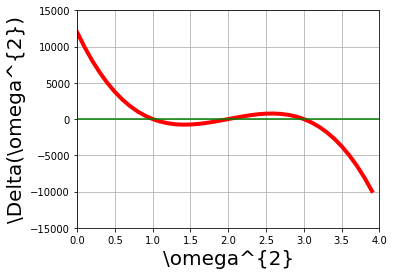

[[ 40 -10 -10]
 [-10  20   0]
 [-10   0  20]]
[[20  0  0]
 [ 0 10  0]
 [ 0  0 10]]
[[ 1.58113883e-01  1.09410197e-16 -1.58113883e-01]
 [ 1.58113883e-01 -2.23606798e-01  1.58113883e-01]
 [ 1.58113883e-01  2.23606798e-01  1.58113883e-01]]
[1. 2. 3.]
[[1.         0.         0.        ]
 [0.         1.41421356 0.        ]
 [0.         0.         1.73205081]]
[[0.15915494 0.         0.        ]
 [0.         0.22507908 0.        ]
 [0.         0.         0.27566445]]


In [17]:
#w^2=eigenvalues
#w=natural frequencies
#{X}= Mode shapes
#delta=([k]-w^2[m]){X}={0}
#(lambda[k]-[m]){X}={0} where lambda = 1/w^2
#Standard Eigenvalue probelem: lambda[I]{X}=[D]{X} where [D]=[k]^-1[m]
#problem 6.65 from lecture
#Solving:
#Stiffness matrix:[k1+k2+k3,-k2,-k3  
#                  -k2,k2+k4,0
#                   -k3,0,k3+k5]
#  = [40,-10,-10
#    -10,20,0
#    -10,0,20]
#Mass matrix:[m1,0,0  
#             0,m2,0
#             0,0,m3]
#  = [20,0,0
#    0,10,0
#    0,0,10]
#therefore delta(w^2) = det[K]-w^2[M]]== [40-20w^2,-10,-10
#                           -10,20-10w^2,0
#                            -10,0,20-10w^2]
#=(40-20w^2)(20-10w^2)(20-10w^2)+(10)(-10)(20-10w^2)-(10)(-10)(20-10w^2)

#plotting delta(w^2) vs w^2 to see natural frequencies:
from matplotlib import pyplot as plt
import numpy as np
import scipy.linalg 
from scipy.linalg import eigh
w20 = 0.0 #start w2
w2f =4 #end w2
w2 = np.arange(w20,w2f,0.1) #interval

Deltaw=((40-20*w2)*(20-10*w2)*(20-10*w2))+((10)*(-10)*(20-10*w2))+((-10)*(-1)*(-10)*(20-10*w2));

plt.plot(w2,Deltaw,color='r',linewidth=4)
plt.xlabel('\omega^{2}',fontsize=20)
plt.ylabel('\Delta(\omega^{2})',fontsize=20)
plt.xlim(0,w2f)
plt.ylim(-15000,15000)
plt.grid(True)
plt.subplots_adjust(left=.2,right=.9,hspace=.4,wspace=.9)
plt.axhline(y=0, color='g', linestyle='-')
plt.show()

#solving eigenvalue problem
#initialise parameters
m=10;m1=2*m;m2=m;m3=m
k=10;k1=2*k;k2=k;k3=k;k4=k;k5=k
#Mass and stiffness matrices
K = [k1+k2+k3,-k2,-k3,  
     -k2,k2+k4,0,
    -k3,0,k3+k5]
K = np.array(K).reshape((3,3))

M = [m1,0,0, 
    0,m2,0,
    0,0,m3]
M = np.array(M).reshape((3,3))

#solve eigenvalue problem



D,V = eigh(K,M, eigvals_only=False)


#Normalise mode shape
mode1 = V[:,0]/V[0,0]
mode2 = V[:,1]/V[0,1]
mode3 = V[:,2]/V[0,2]

#Natural frequencies
w=np.sqrt(np.diag(D));
f=w/(2*np.pi)
print(K)
print(M)
print(V)
print(D)
print(w)
print(f)

In [18]:
#Problem 5.5
m=20;m1=m;m2=2*m
k=1000;k1=k;k2=2*k
#Mass and stiffness matrices
K = [k1+k2,-k2,  
     -k2,k2]
K = np.array(K).reshape((2,2))

M = [m1,0, 
    0,m2]
M = np.array(M).reshape((2,2))

#solve eigenvalue problem



D,V = eigh(K,M, eigvals_only=False)


#Normalise mode shape
mode1 = V[:,0]/V[0,0]
mode2 = V[:,1]/V[0,1]


#Natural frequencies
w=np.sqrt(np.diag(D));
f=w/(2*np.pi)
print(K)
print(M)
# print(V)
# print(D)
# print(w)
print(f)
print(mode1)
print(mode2)

[[ 3000 -2000]
 [-2000  2000]]
[[20  0]
 [ 0 40]]
[[0.58254752 0.        ]
 [0.         2.17409695]]
[1.        1.3660254]
[ 1.        -0.3660254]


# Theme 6

In [6]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import cmath
from scipy.linalg import eigh

### MDOF Equations of Motion

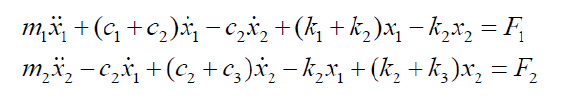

In [7]:
from IPython.display import Image
Image('MDOF1.png',embed=True)

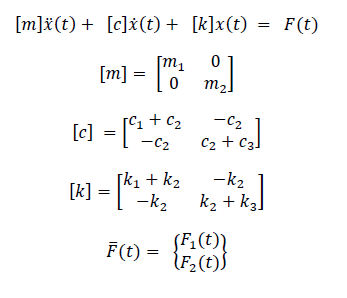

In [8]:
from IPython.display import Image
Image('MDOF2.png',embed=True)

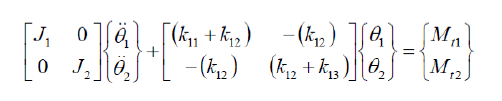

In [9]:
from IPython.display import Image
Image('MDOF3.png',embed=True)

##### Please perform EOM equations before moving to calculation below. Below calculations are general and may change with  system. You only need to alter the matrices when systems differ. The calculations will do the rest for you.

In [69]:
ptype='linear'  #Type 'linear' or 'torsion2elements' or 'torsion3elements'

#INPUTS

F1=1
F2=1

M1=1   #For Torsion (moment)
M2=1   #For Torsion (moment)
M3=1   #For Torsion (moment)

J1=1    #For Torsion
J2=1    #For Torsion
J3=1    #For Torsion
kt=1    #For Torsion 3 Elements Simplified;kt is constant throughout shaft. May have to adjust code if not
kt1=1   #For Torsion 2 Elements
kt2=1   #For Torsion 2 Elements
kt3=1   #For Torsion 2 ELements

m1=1
m2=2
k1=800
k2=400
k3=0
c1=0
c2=0
c3=0

'========================================================================================================================'

#CALCULATOR (May Need to change matrices after calculation EOM)

if ptype=='linear':
    massmatrix=np.matrix([[m1,0],[0,m2]])
    cmatrix=np.matrix([[c1+c2,-c2],[-c2,c2+c3]])
    kmatrix=np.matrix([[k1+k2,-k2],[-k2,k2+k3]])
    Imatrix=np.matrix([[1,0],[0,1]])
    Fmatrix=np.matrix([[F1],[F2]])
    zeromatrix=np.matrix([[0,0],[0,0]])
    E11=zeromatrix
    E12=Imatrix
    E21=kmatrix*-massmatrix**-1
    E22=cmatrix*-massmatrix**-1
    print('The Mass matrix is : \n {}'.format(massmatrix));print()
    print('The C matrix is : \n {}'.format(cmatrix));print()
    print('The K matrix is : \n {}'.format(kmatrix));print()
    #print('The Runge Katte Solution is as follows:')
    #E=np.matrix([[E11,E12],[E21,E22]])
    #print('E11 :\n',E11)
    #print('E12 :\n',E12)
    #print('E21 :\n',E21)
    #print('E22 :\n',E22)
    eigvect,eigval=eigh(kmatrix,massmatrix)
    w1=np.sqrt(eigvect[0])
    w2=np.sqrt(eigvect[1])
    print('The Eigenvector is :\n',eigvect)
    print('The Eigenvalue is :\n',eigval);print()
    print('w1^2 = {}'.format(eigvect[0]));print()
    print('w2^2 = {}'.format(eigvect[1]));print()
    print('Frequency w1 = {}'.format(w1),'rad/s')
    print('Frequency w1 = {}'.format(w1/(2*np.pi)),'Hz')
    print('Frequency w2 = {}'.format(w2),'rad/s')
    print('Frequency w2 = {}'.format(w2/(2*np.pi)),'Hz')
elif ptype=='torsion2elements':
    Jmatrix=np.matrix([[J1,0],[0,J2]])
    cmatrix=np.matrix([[0,0],[0,0]])
    ktmatrix=np.matrix([[kt1+kt2,-kt2],[-kt2,kt2+kt3]])
    Imatrix=np.matrix([[1,0],[0,1]])
    Mtmatrix=np.matrix([[M1],[M2]])
    zeromatrix=np.matrix([[0,0],[0,0]])
    print('The J Matrix is : \n{}'.format(Jmatrix))
    E11=zeromatrix
    E12=Imatrix
    E21=ktmatrix*-Jmatrix**-1
    E22=cmatrix*-Jmatrix**-1
    #print('The Runge Katte Solution is as follows:')
    #E=np.matrix([[E11,E12],[E21,E22]])
    eigvect,eigval=eigh(ktmatrix,Jmatrix)
    w1=np.sqrt(eigvect[0])
    w2=np.sqrt(eigvect[1])
    print('The Eigenvector is :\n',eigvect);print()
    print('The Eigenvalue is :\n',eigval);print()
    print('w1^2 = {}'.format(eigvect[0]));print()
    print('w2^2 = {}'.format(eigvect[1]));print()
    print('Frequency w1 = {}'.format(w1),'rad/s')
    print('Frequency w1 = {}'.format(w1/(2*np.pi)),'Hz')
    print('Frequency w2 = {}'.format(w2),'rad/s')
    print('Frequency w2 = {}'.format(w2/(2*np.pi)),'Hz')
elif ptype=='torsion3elements':
    Jmatrix=np.matrix([[J1,0,0],[0,J2,0],[0,0,J3]])
    cmatrix=np.matrix([[0,0,0],[0,0,0],[0,0,0]])
    ktmatrix=np.matrix([[kt,-kt,0],[-kt,2*kt,-kt],[0,-kt,kt]])
    Imatrix=np.matrix([[1,0,0],[0,1,0],[0,0,1]])
    Mtmatrix=np.matrix([[M1],[M2],[M3]])
    zeromatrix=np.matrix([[0,0,0],[0,0,0],[0,0,0]])
    print('The J Matrix is : \n{}'.format(Jmatrix));print()
    eigvect,eigval=eigh(ktmatrix,Jmatrix)
    w1=np.sqrt(abs(eigvect[0]))
    w2=np.sqrt(abs(eigvect[1]))
    w3=np.sqrt(abs(eigvect[2]))
    print('The Eigenvector is :\n',eigvect);print()
    print('The Eigenvalue is :\n',eigval);print()
    print('w1^2 = {}'.format(round(eigvect[0],2)))
    print('w2^2 = {}'.format(round(eigvect[1],2)))
    print('w2^3 = {}'.format(round(eigvect[2],2)));print()
    print('Frequency w1 = {}'.format(w1),'rad/s')
    print('Frequency f1 = {}'.format(w1/(2*np.pi)),'Hz')
    print('Frequency w2 = {}'.format(w2),'rad/s')
    print('Frequency f2 = {}'.format(w2/(2*np.pi)),'Hz')
    print('Frequency w3 = {}'.format(w3),'rad/s')
    print('Frequency f3 = {}'.format(w3/(2*np.pi)),'Hz')
    
print()
if ptype=='linear':
    w=sp.symbols('w')
    det=kmatrix-w**2*massmatrix
    print('The determinant matrix is:')
    display(sp.simplify(det))
elif ptype=='torsion2elements':
    w=sp.symbols('w')
    det=ktmatrix-w**2*Jmatrix
    print('The determinant matrix is:')
    display(sp.simplify(det))
elif ptype=='torsion3elements':
    w=sp.symbols('w')
    det=ktmatrix-w**2*Jmatrix
    print('The determinant matrix is:')
    display(sp.simplify(det))
    
z=det.shape

#Change the code below to ktmatrix and Jmatrix for torsion problem
if z==(2,2):
    if bool(w1)==True:
        det=kmatrix-w1**2*massmatrix   ###change kmatrix and massmatrix to ktmatrix and Jmatrix for torsion
        print()
        print('The determinant matrix for w1 is:')
        display(sp.Matrix(det));print()
        solX1=sp.Matrix([[sp.simplify(det[0,0]/det[0,0])],[sp.simplify(det[0,0]/-det[0,1])]])
        print('The mode shape X1 is :')
        display(solX1)
    if bool(w2)==True:
        det=kmatrix-w2**2*massmatrix   ###change kmatrix and massmatrix to ktmatrix and Jmatrix for torsion 
        print()
        print('The determinant matrix for w2 is:')
        display(sp.Matrix(det));print()
        solX2=sp.Matrix([[sp.simplify(det[0,0]/det[0,0])],[sp.simplify(det[0,0]/-det[0,1])]])
        print('The mode shape X2 is :')
        display(solX2)

elif z==(3,3):
    if bool(w1)==True:
        det=kmatrix-w1**2*massmatrix   ###change kmatrix and massmatrix to ktmatrix and Jmatrix for torsion
        print()
        print('The determinant matrix for w1 is:')
        display(sp.Matrix(det));print()
        solX1=sp.Matrix([[sp.simplify(det[0,0]/det[0,0])],[sp.simplify(det[0,0]/-det[0,1])]])
        print('The mode shape X1 is :')
        display(solX1)
    if bool(w2)==True:
        det=kmatrix-w2**2*massmatrix   ###change kmatrix and massmatrix to ktmatrix and Jmatrix for torsion 
        print()
        print('The determinant matrix for w2 is:')
        display(sp.Matrix(det));print()
        solX2=sp.Matrix([[sp.simplify(det[0,0]/det[0,0])],[sp.simplify(det[0,0]/-det[0,1])]])
        print('The mode shape X2 is :')
        display(solX2)
    if bool(w3)==True:
        det=kmatrix-w3**2*massmatrix   ###change kmatrix and massmatrix to ktmatrix and Jmatrix for torsion 
        print()
        print('The determinant matrix for w3 is:')
        display(sp.Matrix(det));print()
        solX3=sp.Matrix([[sp.simplify(det[0,0]/det[0,0])],[sp.simplify(det[0,0]/-det[0,1])]])
        print('The mode shape X2 is :')
        display(solX3)

The Mass matrix is : 
 [[1 0]
 [0 2]]

The C matrix is : 
 [[0 0]
 [0 0]]

The K matrix is : 
 [[1200 -400]
 [-400  400]]

The Eigenvector is :
 [ 125.54373535 1274.45626465]
The Eigenvalue is :
 [[-0.25456995 -0.96705436]
 [-0.6838107   0.18000814]]

w1^2 = 125.54373534619708

w2^2 = 1274.456264653803

Frequency w1 = 11.204630085201256 rad/s
Frequency w1 = 1.7832722635759444 Hz
Frequency w2 = 35.69952751303304 rad/s
Frequency w2 = 5.681756269744326 Hz

The determinant matrix is:


[[1200 - w**2, -400], [-400, 400 - 2*w**2]]


The determinant matrix for w1 is:


Matrix([
[1074.4562646538,           -400.0],
[         -400.0, 148.912529307606]])


The mode shape X1 is :


Matrix([
[             1.0],
[2.68614066163451]])


The determinant matrix for w2 is:


Matrix([
[-74.4562646538029,            -400.0],
[           -400.0, -2148.91252930761]])


The mode shape X2 is :


Matrix([
[               1.0],
[-0.186140661634507]])

### Vibrational Isolation without damping

In [11]:
# Determine Excitation w
wtype='Hz'   #insert either 'rpm', 'Hz' or 's' for seconds
heavy='N'    #insert either 'N' or 'kg'
kconst='not given'   #insert 'given or 'not Given
vibriso=10   # %of vibration that is isolated

rpm1=1   #Doubt that you will get rpm
rpm2=1

Hz1=1
Hz2=1

s1=1
s2=1

m=1   #Either Newtons or kg
g=1

k1=1
k2=1

#Note you might need to manually change the r value in the code

'========================================================================================================================='
if heavy=='N':
    mass=m/g
    print('The mass is {} kg'.format(mass));print()
elif heavy=='kg':
    mass=m
    print('The mass is {} kg'.format(mass));print()
if wtype=='Hz':
    w1=2*np.pi*Hz1
    w2=Hz2*2*np.pi
    print('w1 = {}'.format(w1),'rad/s')
    print('w2 = {}'.format(w2),'rad/s');print()

elif wtype=='s':
    w1=1/s1*2*np.pi
    w2=1/s2*2*np.pi
    print('w1 = {}'.format(w1))
    print('w2 = {}'.format(w2))

elif wtype=='rpm':
    w1=2*np.pi*rpm1/60
    w2=2*np.pi*rpm2/60
    print('w1 = {}'.format(w1))
    print('w2 = {}'.format(w2))
    
# Determine frequency ratio r

Tr=1-vibriso/100
print('Tr = {}'.format(round(Tr,4)));print()
a=Tr**2
b=-2*Tr**2
c=Tr**2-1
d=(-2*Tr**2)**2-4*(Tr**2)*(Tr**2-1)
r2sol1=(-b+np.sqrt(d))/(2*a)
r2sol2=(-b-np.sqrt(d))/(2*a)
r2=[r2sol1,r2sol2]
print('r^2 = {}'.format(r2));print()
if r2[0]>=0:
    r1=np.sqrt(r2[0])
    print('r1 = {}'.format(round(r1,3)))
else:
    print('Cannot squareroot a negative therefore r1 has not solution')
    
if r2[1]>=0:
    r2=np.sqrt(r2[1])
    print('r2 = {}'.format(round(r2,3)))
else:
    print('Cannot squareroot a negative therefore r2 has not solution')


    
r=r1   #Change to either r1 or r2 based on which is positive  

#Determine Natural Frequencies

if kconst=='given':
    wn1=np.sqrt(k1/m)
    wn2=np.sqrt(k2/m)
elif kconst=='not given':
    wn1=w1/r  #Might have to override wn if k constants are given. wn=sqrt(k/m).
    wn2=w2/r

print()
print('The natural frequencies are wn1 : {} rads/s and wn2 : {} rad/s'.format(round(wn1,2),round(wn2,2)));print()


#Determine displacements

dst1=g/(wn1**2)
dst2=g/(wn2**2)

if wtype=='Hz':
    print('At {} Hz the displacement is {} m'.format(Hz1,dst1))
    print('At {} Hz the displacement is {} m'.format(Hz2,dst2))

elif wtype=='s':
    print('At {} s the displacement is {} m'.format(s1,dst1))
    print('At {} s the displacement is {} m'.format(s2,dst2))

The mass is 1.0 kg

w1 = 6.283185307179586 rad/s
w2 = 6.283185307179586 rad/s

Tr = 0.9

r^2 = [2.1111111111111107, -0.11111111111111106]

r1 = 1.453
Cannot squareroot a negative therefore r2 has not solution

The natural frequencies are wn1 : 4.32 rads/s and wn2 : 4.32 rad/s

At 1 Hz the displacement is 0.05347506914456714 m
At 1 Hz the displacement is 0.05347506914456714 m


### Vibrational isolation with damping (w/ force transmissibility)

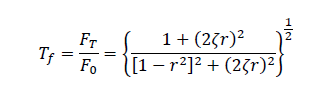

In [12]:
Image('VIFT.png',embed=True)

In [13]:
# Determine Excitation w
wtype='rpm'   #insert either 'rpm', 'Hz' or 's' for seconds
heavy='N'    #insert either 'N' or 'kg'
kconst='not given'   #insert 'given or 'not Given

rpm=1  


Hz1=1
Hz2=1

s1=1
s2=1

m=1   #Either Newtons or kg
g=9.81

k1=1
k2=1

Tf=0.1   #Force transmission %
dr=0.5   #Damping Ratio

imbalance=1

#May have to manually change r value

'========================================================================================================================='
if heavy=='N':
    mass=m/g
    print('The mass is {} kg'.format(mass));print()
elif heavy=='kg':
    mass=m
    print('The mass is {} kg'.format(mass));print()
if wtype=='Hz':
    w1=2*np.pi*Hz1
    w2=Hz2*2*np.pi
    print('w1 = {}'.format(w1),'rad/s')
    print('w2 = {}'.format(w2),'rad/s');print()

elif wtype=='s':
    w1=1/s1*2*np.pi
    w2=1/s2*2*np.pi
    print('w1 = {}'.format(w1))
    print('w2 = {}'.format(w2))

elif wtype=='rpm':
    w=2*np.pi*rpm/60
    print('w = {} rad/s'.format(w))


#Force transmissibility - calculating r

a=Tf**2
b=-2*Tf**2+4*dr**2*Tf**2-4*dr**2
c=Tf**2-1
d=b**2-4*a*c
r2sol1=(-b+np.sqrt(d))/(2*a)  #Solving Quadratic Eqn
r2sol2=(-b-np.sqrt(d))/(2*a)  #Solving Quadratic Eqn
r2=[r2sol1,r2sol2]
print('r^2 = {}'.format(r2));print()
if r2[0]>=0:
    r1=np.sqrt(r2[0])
    print('r1 = {}'.format(round(r1,3)))
else:
    print('Cannot squareroot a negative therefore r1 has not solution')
    
if r2[1]>=0:
    r2=np.sqrt(r2[1])
    print('r2 = {}'.format(round(r2,2)))
else:
    print('Cannot squareroot a negative therefore r2 has not solution')
print()

    
r=r1   #Change to either r1 or r2 based on which is positive  

#Find natural frequency wn
wn=w/r
print('wn = {} rad/s'.format(round(wn,2)));print()

#Find spring constant k
k=mass*wn**2
print('The spring constant k is {} N/m or {} kN/m'.format(round(k,2),round(k/1000,2)));print()

#Find Critical Damping Constant
Cc=2*np.sqrt(k*mass)
print('The Cc value is {} Ns/m'.format(round(Cc,2)))

#Find damping value
C=dr*Cc
print('The damping value C is {} Ns/m'.format(round(C,2)))

#Determining maxmimum displacement
print()
print('Maximum displacement occurs at resonance when w=wn and r=1')
w=wn
print('w = wn = {} rad/s'.format(round(w,2)));print()

print('F0 = mRw^2')
F0=imbalance*w**2
print('F0 = {} N'.format(round(F0,2)));print()

print('dst= F0/k')
dst=F0/k
print('dst = {} m'.format(round(dst,5)));print()

print('X/dst = 1/(2*(dr)*r) where r=1 because of resonance')
print('X = dst/(2*dr)')
X=dst/(2*dr)
print('X = {} m'.format(round(X,5)))



The mass is 0.1019367991845056 kg

w = 0.10471975511965977 rad/s
r^2 = [101.97086554547144, -0.9708655454714552]

r1 = 10.098
Cannot squareroot a negative therefore r2 has not solution

wn = 0.01 rad/s

The spring constant k is 0.0 N/m or 0.0 kN/m

The Cc value is 0.0 Ns/m
The damping value C is 0.0 Ns/m

Maximum displacement occurs at resonance when w=wn and r=1
w = wn = 0.01 rad/s

F0 = mRw^2
F0 = 0.0 N

dst= F0/k
dst = 9.81 m

X/dst = 1/(2*(dr)*r) where r=1 because of resonance
X = dst/(2*dr)
X = 9.81 m


## Unbalanced Masses

##### Single Plane Balancing

In [14]:
#Finding magnitude and direction of balancing mass

#Define Vectors with CCW as +
#The formula is z=Ae^(itheta)

trialmassmetric='g'
trtialdispmetrix='mm'
trial_ang='clockwise' #insert 'clockwise' or 'ccw'

orig_ampl=0.25
orig_ang=40

trialmass=170
trialang=65
trialamp=0.5
trialphaseang=150

radialdist=65
'========================================================================================================================='
if trial_ang=='clockwise':
    trial_angle=360-trialang
elif trial_ang =='ccw':
    trial_angle=trialang
V=orig_ampl*np.exp(orig_ang*1j*np.pi/180)  #Original unbalance
W=trialmass*np.exp((trial_angle)*1j*np.pi/180)   #Added Weight
Vp=trialamp*np.exp(trialphaseang*np.pi*1j/180)

A=(Vp-V)/W
U=V/A
B=-U

#Imbalance
Um=abs(U)   #Imbalance Magnitude
Ua=cmath.phase(U)*180/np.pi   #Imbalance Angle

#Balance
Bm=abs(B)
Ba=cmath.phase(B)*180/np.pi

print('The imbalanced magnitude is {} {} and the phase angle is {} degrees:'.format(round(Um,2),trialmassmetric,round(Ua,2)))
print()
print('The balanced magnitude is {} {} and the phase angle is {} degrees:'.format(round(Bm,2),trialmassmetric,round(Ba,2)))

The imbalanced magnitude is 67.37 g and the phase angle is 163.14 degrees:

The balanced magnitude is 67.37 g and the phase angle is -16.86 degrees:


##### Two-plane balancing 

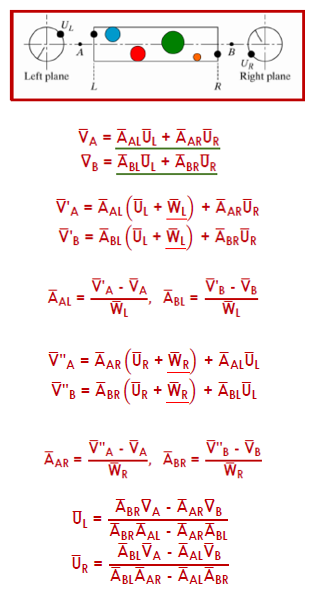

In [15]:
Image('Twoplane.png',embed=True)

In [16]:
# Given a table

trialmassmetric='g'
trialdispmetric='mm'


Amag=0.2          #Original unbalance magnitude at point A
Aang=60           #Original unbalance phase angle at point A
Bmag=0.16         #Original unbalance phase angle at point B
Bang=205          #Original unbalance phase angle at point B

WLAmag=0.15
WLAang=125
WLBmag=0.1
WLBang=230

WRAmag=0.15
WRAang=35
WRBmag=0.25
WRBang=160

ConditionWLmass=300
ConditionWLangle=270
ConditionWRmass=340
ConditionWRang=180


'=========================================================================================================================='
VA=Amag*np.exp(Aang*1j*np.pi/180)
VB=Bmag*np.exp(Bang*1j*np.pi/180)
VAp=WLAmag*np.exp(WLAang*1j*np.pi/180)
VBp=WLBmag*np.exp(WLBang*1j*np.pi/180)
VApp=WRAmag*np.exp(WRAang*1j*np.pi/180)
VBpp=WRBmag*np.exp(WRBang*1j*np.pi/180)
WL=ConditionWLmass*np.exp(ConditionWLangle*1j*np.pi/180)
WR=ConditionWRmass*np.exp(ConditionWRang*1j*np.pi/180)

#Transfer Weight to Ends
AAL=(VAp-VA)/WL
ABL=(VBp-VB)/WL
AAR=(VApp-VA)/WR
ABR=(VBpp-VB)/WR

#Calculate Unbalances
UL=(ABR*VA-AAR*VB)/(ABR*AAL-AAR*ABL)
UR=(ABL*VA-AAL*VB)/(ABL*AAR-AAL*ABR)

#Calculate Balances
BL=-UL
BR=-UR

#Solution
BLmag=abs(BL)
BLang=np.angle(BL)*180/np.pi
BRmag=abs(BR)
BRang=np.angle(BR)*180/np.pi

print('The left balance magnitude is {} {} with a phase angle of {} degrees.'.format(round(BLmag,2),trialmassmetric,round(BLang,2)))
print('The right balance magnitude is {} {} with a phase angle of {} degrees.'.format(round(BRmag,2),trialmassmetric,round(BRang,2)))

The left balance magnitude is 299.1 g with a phase angle of -31.07 degrees.
The right balance magnitude is 183.53 g with a phase angle of 61.55 degrees.


In [19]:
import numpy as np
import sympy as sp
import cmath as cm
from IPython.display import display as dsp
import matplotlib.pyplot as plt

In [20]:
#single Plane
# V = AU             V' = AU + AW
#z = Ae^(i*theta)

Ai = 0.25
th1 = np.radians(40)

w = 750
thw = np.radians(360-65)

Ar = 0.5
thr = np.radians(150)

V = Ai*np.exp(th1*1j)
W = w*np.exp(thw*1j)
Vp = Ar*np.exp(thr*1j)

A = (Vp-V)/W
a = cm.polar(A)
print('A response =', a[0],'ang',np.degrees(a[1]))
U = V/A
u = cm.polar(U)
print('U response =',u[0],'ang',np.degrees(u[1]))
B = -U
b = cm.polar(B)
print('Balancing =',b[0],'ang',np.degrees(b[1]))

# radius effect not included

A response = 0.0008411685373007849 ang -123.13778127840581
U response = 297.2056002025727 ang 163.1377812784058
Balancing = 297.2056002025727 ang -16.8622187215942


In [21]:
#P9.3
m1=35
m2=15
m3=25
r1=110
r2=90
r3=130

th1 = np.radians(40)
th2 = np.radians(220)
th3 = np.radians(290)

u1 = m1*r1*np.exp(th1*1j)
u2 = m2*r2*np.exp(th2*1j)
u3 = m3*r3*np.exp(th3*1j)

u = -1*(u1+u2+u3)
u4 = cm.polar(u)
print('mc*rc =',u4[0])
print('u4 =',u4[0],'ang',np.degrees(u4[1]))
sums = u1+u2+u3+u
print('sum(u)',sums)

mc*rc = 3354.798454595729
u4 = 3354.798454595729 ang 154.44787679885317
sum(u) 0j


In [22]:
#Two plane balancing
Wl = 0.300
pwl = np.radians(270)
Wr=0.340
pwr =np.radians(180)

WL=Wl*np.exp(pwl*1j)
WR=Wr*np.exp(pwr*1j)

Aa=0.2
Al=0.15
Ar=0.15

Bb=0.16
Bl=0.1
Br=0.25

pa=np.radians(60)
pal=np.radians(125)
par=np.radians(35)

pb=np.radians(205)
pbl=np.radians(230)
pbr=np.radians(160)

Va=Aa*np.exp(pa*1j)
Vb=Bb*np.exp(pb*1j)

Vap=Al*np.exp(pal*1j)
Vbp=Bl*np.exp(pbl*1j)

Vapp=Ar*np.exp(par*1j)
Vbpp=Br*np.exp(pbr*1j)

AAL=(Vap-Va)/WL
ABL=(Vbp-Vb)/WL

AAR=(Vapp-Va)/WR
ABR=(Vbpp-Vb)/WR

UL = (ABR*Va-AAR*Vb)/(ABR*AAL-AAR*ABL)
UR = (ABL*Va-AAL*Vb)/(ABL*AAR-AAL*ABR)

BL=-UL
print(BL)
BR=-UR
print(BR)

bl = cm.polar(BL)
br = cm.polar(BR)

print('left balance BL=',bl[0],'ang',np.degrees(bl[1]))
print('right balance BR=',br[0],'ang',np.degrees(br[1]))

(0.25618056098159053-0.15436791905828656j)
(0.08742161350560944+0.16137293859732477j)
left balance BL= 0.29909519263811 ang -31.072102588532477
right balance BR= 0.18353137012363882 ang 61.553977254076194


In [23]:
#Balancing problem

R1=0.254
R2=0.102
R3=0.203

R=0.051

M1=2.27
M2=0.454
M3=0.907

p1= np.radians(90)
p2 = np.radians(270)
p3 = np.radians(270)

#A as reference

L1 = -0.076
L2 = 0
L3 = 0.102
#calc moments about A to get MB

MB = (-L1*M1*R1*np.exp(p1*1j)-L3*M3*R3*np.exp(p3*1j))/(L3*R)
mb = cm.polar(MB)
print('MB =',mb[0],'ang',np.degrees(mb[1]))

#B as ref

l1 = 0.102+0.051+0.025
l2 = 0.102
l3 = 0

MA = (l1*R1*M1*np.exp(p1*1j)+l2*R2*M2*np.exp(p2*1j))/(l2*R)
ma = cm.polar(MA)
print('MA =',ma[0],'ang',np.degrees(ma[1]))


MB = 12.033914263744716 ang 90.0
MA = 18.821188773548638 ang 90.0


In [24]:
#recip engine
#4 in-line with ref plane in middle

mp = 1.5
mc = 0
r = 0.15/2
w = 1500*2*np.pi/60
l = 1

alpha = np.radians(np.array([0,180,90,270]))

Fxp = (mp+mc)*r*w**2*(np.cos(alpha[0])+ np.cos(alpha[1])+np.cos(alpha[2])+np.cos(alpha[3]))
cp = np.array([np.cos(alpha[0]), np.cos(alpha[1]), np.cos(alpha[2]), np.cos(alpha[3])])
print('primary forces in x =',Fxp)

Fxs = mp*(r**2*w**2/l)*(np.cos(2*alpha[0])+ np.cos(2*alpha[1])+np.cos(2*alpha[2])+np.cos(2*alpha[3]))
cs = np.array([np.cos(2*alpha[0]), np.cos(2*alpha[1]),np.cos(2*alpha[2]),np.cos(2*alpha[3])])
print('secondary forces in x =',Fxs)

Fyp = -mc*r*w**2*(np.sin(alpha[0])+ np.sin(alpha[1])+np.sin(alpha[2])+np.sin(alpha[3]))
sp = np.array([np.sin(alpha[0]), np.sin(alpha[1]),np.sin(alpha[2]),np.sin(alpha[3])])
print('primary forces in y =',Fyp)

Myp = (mp+mc)*r*w**2*(0.15*cp[0] +0.05*cp[1] -0.05*cp[2] - 0.15*cp[3])
print('primary moment about y =', Myp)
Mys = mp*(r**2*w**2/l)*(0.15*cs[0] +0.05*cs[1] -0.05*cs[2] - 0.15*cs[3])
print('secondary moments about y =',Mys)

Mxp = -mc*r*w**2*(0.15*sp[0] +0.05*sp[1] -0.05*sp[2] - 0.15*sp[3])
print(Mxp)

primary forces in x = -3.3994067171188244e-13
secondary forces in x = 0.0
primary forces in y = 0.0
primary moment about y = 277.58262378063824
secondary moments about y = 83.27478713419146
0.0


In [25]:
#vibration isolation example
import sympy as sp
x1,x2,m1,m2,w,k,F = sp.symbols('x1,x2,m1,m2,w,k,F')

y= sp.Matrix([[k-m1*w**2, -k],[-k, k-m2*w**2]])
f = sp.Matrix([[F],[0]])
sol = sp.det(y)

eqn = sp.Eq(sol,0)

ans = sp.solve(eqn,w**2)

dsp(ans)

eqn2 = (x2*(k-m2*w**2))/k - (F+x2*k)/(k-m1*w**2)

ans2 = sp.solve(eqn2,x2)

dsp("x2 =", ans2)

eqn1 = sp.Eq(x1*k/(k-m2*w**2) + F/k - (x1*(k-m1*w**2))/k, 0)

ans1 = sp.solve(eqn1,x1)

dsp('x1=',ans1)


[0, k/m2 + k/m1]

'x2 ='

[F*k/(w**2*(-k*m1 - k*m2 + m1*m2*w**2))]

'x1='

[F*(-k + m2*w**2)/(w**2*(k*m1 + k*m2 - m1*m2*w**2))]

In [26]:
#isolation washing machine prob
#SP 9.32
r = sp.symbols('r')
isolation = 75/100
Tr = 1 - isolation
Z = 7/100
m = 50
rpm = 1200
w = rpm*np.pi/30

eqn = sp.Eq((1+(2*Z*r)**2)/((1-r**2)**2+(2*Z*r)**2) - Tr**2,0)

r_ans = sp.solve(eqn,r)

r_max = ans[1]

wn = w/r_max

k_max = wn**2*m

print('max stiffness for {}% isolation = {} N/m'.format(isolation*100,k_max))

max stiffness for 75.0% isolation = 789568.352087149/(k/m2 + k/m1)**2 N/m


In [27]:
#Absorbers (heli)
import sympy as sp
x1,x2,m1,m2,w,k1,k2,F = sp.symbols('x1,x2,m1,m2,w,k1,k2,F')

y= sp.Matrix([[k1+k2-m1*w**2, -k2],[-k2, k2-m2*w**2]])
f = sp.Matrix([[F],[0]])
sol = sp.det(y)

eqn = sp.Eq(sol,0)

ans = sp.solve(eqn,w**2)

dsp('nat freq',ans)

eqn2 = sp.Eq((F+x2*k2)/(k1+k2-m1*w**2)- (x2*(k2-m2*w**2))/k2,0)

ans2 = sp.solve(eqn2,x2)

dsp("x2 =", ans2)

eqn1 = sp.Eq((x1*(k1+k2-m1*w**2)-F)/k2 - x1*k2/(k2-m2*w**2),0)

ans1 = sp.solve(eqn1,x1)

dsp('x1=',ans1)

p = sp.expand((k1+k2-m1*w**2)*(k2-m2*w**2) -k2**2)

print(p)

'nat freq'

[(k1*m2 + k2*m1 + k2*m2 - sqrt(k1**2*m2**2 - 2*k1*k2*m1*m2 + 2*k1*k2*m2**2 + k2**2*m1**2 + 2*k2**2*m1*m2 + k2**2*m2**2))/(2*m1*m2),
 (k1*m2 + k2*m1 + k2*m2 + sqrt(k1**2*m2**2 - 2*k1*k2*m1*m2 + 2*k1*k2*m2**2 + k2**2*m1**2 + 2*k2**2*m1*m2 + k2**2*m2**2))/(2*m1*m2)]

'x2 ='

[F*k2/(k1*k2 - k1*m2*w**2 - k2*m1*w**2 - k2*m2*w**2 + m1*m2*w**4)]

'x1='

[F*(-k2 + m2*w**2)/(-k1*k2 + k1*m2*w**2 + k2*m1*w**2 + k2*m2*w**2 - m1*m2*w**4)]

k1*k2 - k1*m2*w**2 - k2*m1*w**2 - k2*m2*w**2 + m1*m2*w**4


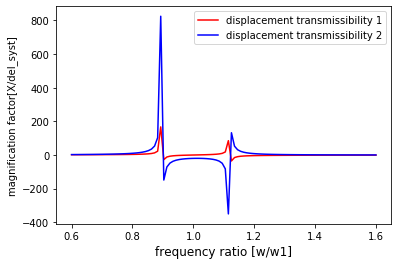

In [28]:
#ignore
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace
r = linspace(0.6,1.6,100 )
w = 1
w1=w2=w/r
k1 = w1**2*20
k2 = w2**2*1
dx1 = (1-r**2)/((1+(k2/k1)-r**2)*(1-r**2)-(k2/k1))
dx2 = 1/((1+(k2/k1)-r**2)*(1-r**2)-(k2/k1))
plt.figure(1)
plt.plot(r, dx1,'r', label = 'displacement transmissibility 1')
plt.plot(r, dx2,'b', label = 'displacement transmissibility 2')
plt.xlabel('frequency ratio [w/w1]', fontsize = 12)
plt.ylabel('magnification factor[X/del_syst]')
plt.legend()
plt.show()

In [29]:
#r1,r2 absorber Q
# determine mass and spring constant if natural freq of syst to be at least 20% away from impressed freq
#P9.67

mu = sp.symbols('mu')
r1 = 0.8
r2 = 1.2
r21 = 1                    #(w2/w1) assump

eqn1 = sp.Eq(((1 + (1+mu)*(r21)**2) - ((1+ (1+mu)*r21**2)**2 -4*(r21)**2)**0.5)/(2*r21**2) - r1**2)

ans1 = sp.solve(eqn,mu)

eqn2 = sp.Eq(((1 + (1+mu)*(r21)**2) + ((1+ (1+mu)*r21**2)**2 -4*(r21)**2)**0.5)/(2*r21**2) - r2**2)

ans2 = sp.solve(eqn2,mu)

print('mu 1 =',ans1)
print('mu 2 =',ans2)

mu 1 = []
mu 2 = [0.134444444444444]
